In [1]:
import pandas as pd;
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../preprocessing/data_clean_Lavi_V2.csv')

In [3]:
df.columns

Index([u'ApplYr', u'Enrolled', u'Admitted', u'PuGoOffer',
       u'HolisticAcademicScore', u'HolisticPQAScore',
       u'HolisticAdmissionScore', u'parent1_ed_level', u'parent2_ed_level',
       u'HighestParentalEducation',
       ...
       u'ed_3', u'ed_4', u'ed_5', u'ed_6', u'ed_1m', u'ed_2m', u'ed_3m',
       u'ed_4m', u'ed_5m', u'AcademicScore_imputed'],
      dtype='object', length=108)

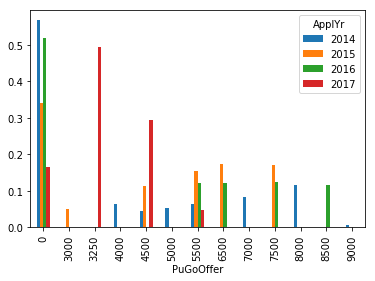

In [6]:
temp = df[df.Admitted == 1]
temp = (temp.groupby('ApplYr').PuGoOffer.value_counts() / temp.groupby('ApplYr').Enrolled.count()).unstack().fillna(0)
temp.T.plot(kind = 'bar')

In [11]:
df = df[df.ApplYr.isin([2014, 2015, 2016])]

In [26]:
df.head()

ApplYr  Enrolled  Admitted  PuGoOffer  HolisticAcademicScore  \
15    2016         0         0          0                      8   
16    2016         0         0          0                      8   
17    2016         0         0          0                     10   
18    2016         0         0          0                     12   
19    2016         0         0          0                     11   

    HolisticPQAScore  HolisticAdmissionScore  parent1_ed_level  \
15                 8                     8.0               5.0   
16                 6                     8.0               5.0   
17                 8                    10.0               3.0   
18                 6                    12.0               6.0   
19                 6                    11.0               1.0   

    parent2_ed_level  HighestParentalEducation          ...           ed_4  \
15               6.0                       6.0          ...              0   
16               4.0                       5.0          ...              0   
17               3.0                       3.0          ...              0   
18               5.0                       6.0          ...              0   
19               1.0                       1.0          ...              0   

    ed_5  ed_6  ed_1m  ed_2m  ed_3m  ed_4m  ed_5m  AcademicScore_imputed  \
15     0     1      1      1      1      1      1               0.764750   
16     1     0      1      1      1      1      1               0.738187   
17     0     0      1      1      1      0      0               0.823625   
18     0     1      1      1      1      1      1               0.884750   
19     0     0      1      0      0      0      0               0.901937   

    tuition_after_grants  
15                 34791  
16                 34791  
17                 34791  
18                 34791  
19                 34791  

[5 rows x 109 columns]

In [16]:
df['tuition_after_grants'] = df['Tuition'] - df['PuGoOffer'] - df['GrantSchol']
df.loc[df.tuition_after_grants < 0, 'tuition_after_grants'] = 0

In [18]:
df.PuGoOffer.hist()

In [22]:
df.PuGoOffer.describe()

count    50023.000000
mean      1688.083482
std       2887.861466
min          0.000000
25%          0.000000
50%          0.000000
75%       4000.000000
max       9000.000000
Name: PuGoOffer, dtype: float64

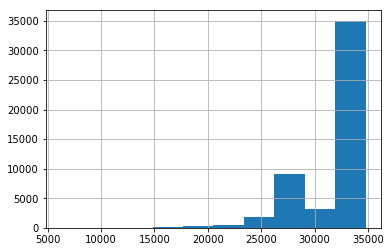

In [23]:
df.tuition_after_grants.hist()

In [33]:
totalStudents = df.groupby(['ApplYr'])['PuGoOffer'].count()

In [34]:
enrolledStudents = df[df.Enrolled == 1].groupby(['ApplYr'])['PuGoOffer'].count()
enrolledStudents

ApplYr
2014    1227
2015    1433
2016    1170
Name: PuGoOffer, dtype: int64

In [35]:
enrolledPcts = enrolledStudents / totalStudents * 100
enrolledPcts

ApplYr
2014    9.241546
2015    8.765062
2016    5.736138
Name: PuGoOffer, dtype: float64

In [37]:
moneyOffered = df.groupby(['ApplYr'])['PuGoOffer'].sum()
moneyOffered

ApplYr
2014    19463000
2015    34415500
2016    30564500
Name: PuGoOffer, dtype: int64

In [38]:
moneyOfferedPerStudent = moneyOffered / totalStudents
moneyOfferedPerStudent

ApplYr
2014    1465.918506
2015    2105.052297
2016    1498.480169
Name: PuGoOffer, dtype: float64

In [39]:
moneyOfferedPerEnrollee = moneyOffered / enrolledStudents
moneyOfferedPerEnrollee

ApplYr
2014    15862.265689
2015    24016.399163
2016    26123.504274
Name: PuGoOffer, dtype: float64

In [41]:
moneySpent = df[df.Enrolled == 1].groupby(['ApplYr'])['PuGoOffer'].sum()
moneySpent

ApplYr
2014    2488000
2015    4119000
2016    2979500
Name: PuGoOffer, dtype: int64

In [20]:
moneySpentPerEnrollee = moneySpent / enrolledStudents
moneySpentPerEnrollee

yr
2014    1759.560618
2015    2285.318560
2016    2612.023460
dtype: float64

In [21]:
yieldAmounts = df[df.IsEnrolledOrMatriculated == 1].groupby(['yr'])['tuition_after_grants'].sum()
yieldAmounts

yr
2014    38130115
2015    45306643
2016    54865155
Name: tuition_after_grants, dtype: int64

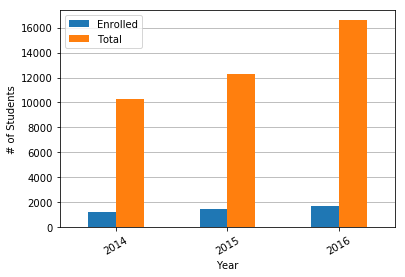

In [22]:
studentCounts = pd.DataFrame({'Enrolled': enrolledStudents, 'Total': totalStudents, 'Pct': enrolledPcts})
ax = studentCounts[['Enrolled', 'Total']].plot.bar(zorder = 100, rot = 30)
ax.yaxis.grid()
ax.set_xlabel('Year');
ax.set_ylabel('# of Students');

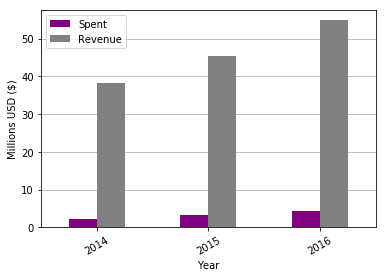

In [23]:
dollarAmounts = pd.DataFrame({'Spent': moneySpent, 'Revenue': yieldAmounts, 'Offered': moneyOffered})
dollarAmounts = dollarAmounts / 1000000
ax = dollarAmounts[['Spent', 'Revenue']].plot.bar(zorder = 100, rot = 30, color = ['purple', 'grey'])
ax.yaxis.grid()
ax.set_xlabel('Year');
ax.set_ylabel('Millions USD ($)');

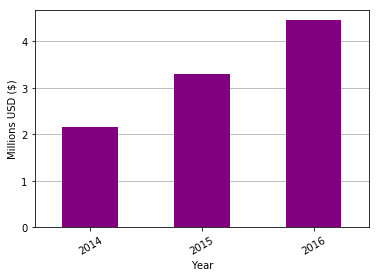

In [24]:
ax = dollarAmounts['Spent'].plot.bar(zorder = 100, rot = 30, color = ['purple'])
ax.yaxis.grid()
ax.set_xlabel('Year');
ax.set_ylabel('Millions USD ($)');

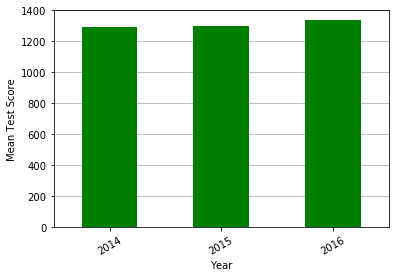

In [25]:
ax = df[df.IsEnrolledOrMatriculated == 1].groupby(['yr'])['TestScore'].mean().plot.bar(zorder = 100, rot = 30, color = ['green'])
ax.yaxis.grid()
ax.set_xlabel('Year');
ax.set_ylabel('Mean Test Score');

In [26]:
df[df.IsEnrolledOrMatriculated == 1]['TestScore'].mean()

1309.9029237094564